In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data = pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [73]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [75]:
data.drop(columns=['url', 'reviews_list', 'phone'], inplace=True)

In [76]:
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].replace("NEW", np.nan)
data["rate"] = data["rate"].str.replace("/5", "", regex=False)

data["rate"] = pd.to_numeric(data["rate"], errors='coerce')
data.head()


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [77]:
data["online_order"] = data["online_order"].map({"Yes": 1, "No": 0})
data["book_table"] = data["book_table"].map({"Yes": 1, "No": 0})
data.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari


In [78]:
data.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      51717 non-null  object 
 1   name                         51717 non-null  object 
 2   online_order                 51717 non-null  int64  
 3   book_table                   51717 non-null  int64  
 4   rate                         41665 non-null  float64
 5   votes                        51717 non-null  int64  
 6   location                     51696 non-null  object 
 7   rest_type                    51490 non-null  object 
 8   dish_liked                   23639 non-null  object 
 9   cuisines                     51672 non-null  object 
 10  approx_cost(for two people)  51371 non-null  object 
 11  menu_item                    51717 non-null  object 
 12  listed_in(type)              51717 non-null  object 
 13  listed_in(city) 

In [80]:
data.describe()

,online_order,book_table,rate,votes
count,51717.000000,51717.000000,41665.000000,51717.000000
mean,0.588665,0.124698,3.700449,283.697527
std,0.492080,0.330379,0.440513,803.838853
min,0.000000,0.000000,1.800000,0.000000
25%,0.000000,0.000000,3.400000,7.000000
50%,1.000000,0.000000,3.700000,41.000000
75%,1.000000,0.000000,4.000000,198.000000
max,1.000000,1.000000,4.900000,16832.000000


In [81]:
data["rate"].isnull().sum()

np.int64(10052)

In [82]:
data["rate"] = data.groupby('cuisines')['rate'].transform(lambda x: x.fillna(x.mean()))
data.head()


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [83]:
data.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            1267
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [84]:
mean_rate = data['rate'].mean()
data['rate'].fillna(mean_rate, inplace=True)

data["rate"].isna().sum() 

C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_42676\2941178966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rate'].fillna(mean_rate, inplace=True)


np.int64(0)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      51717 non-null  object 
 1   name                         51717 non-null  object 
 2   online_order                 51717 non-null  int64  
 3   book_table                   51717 non-null  int64  
 4   rate                         51717 non-null  float64
 5   votes                        51717 non-null  int64  
 6   location                     51696 non-null  object 
 7   rest_type                    51490 non-null  object 
 8   dish_liked                   23639 non-null  object 
 9   cuisines                     51672 non-null  object 
 10  approx_cost(for two people)  51371 non-null  object 
 11  menu_item                    51717 non-null  object 
 12  listed_in(type)              51717 non-null  object 
 13  listed_in(city) 

In [86]:
data.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [87]:
data['has_dish_info'] = data['dish_liked'].notna().astype(int)


In [88]:
data["dish_liked"].fillna("No popular dish reported", inplace=True)

C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_42676\2987430506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["dish_liked"].fillna("No popular dish reported", inplace=True)


In [89]:
data.isna().sum()

address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
dish_liked                       0
cuisines                        45
approx_cost(for two people)    346
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
has_dish_info                    0
dtype: int64

In [90]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',', '', regex=True)
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'], errors='coerce')

median_cost = data['approx_cost(for two people)'].median()
data['approx_cost(for two people)'].fillna(median_cost, inplace=True)
data.isna().sum()

C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_42676\3515437162.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['approx_cost(for two people)'].fillna(median_cost, inplace=True)


address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
dish_liked                       0
cuisines                        45
approx_cost(for two people)      0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
has_dish_info                    0
dtype: int64

In [91]:
data["location"].fillna("Not Available", inplace=True)
data['rest_type'].fillna('Unknown', inplace=True)
data['cuisines'].fillna('Various', inplace=True)
data.isna().sum()

C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_42676\1049947760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["location"].fillna("Not Available", inplace=True)
C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_42676\1049947760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
has_dish_info                  0
dtype: int64

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      51717 non-null  object 
 1   name                         51717 non-null  object 
 2   online_order                 51717 non-null  int64  
 3   book_table                   51717 non-null  int64  
 4   rate                         51717 non-null  float64
 5   votes                        51717 non-null  int64  
 6   location                     51717 non-null  object 
 7   rest_type                    51717 non-null  object 
 8   dish_liked                   51717 non-null  object 
 9   cuisines                     51717 non-null  object 
 10  approx_cost(for two people)  51717 non-null  float64
 11  menu_item                    51717 non-null  object 
 12  listed_in(type)              51717 non-null  object 
 13  listed_in(city) 

In [93]:
data["cost_category"] = None
data.loc[data["approx_cost(for two people)"] <= 500, 'cost_category'] = "Low"

In [94]:
data.loc[(data["approx_cost(for two people)"]  > 500) &
         (data['approx_cost(for two people)'] < 900), 'cost_category'] = "Medium"

In [95]:
data.loc[data['approx_cost(for two people)'] > 900, 'cost_category'] = "Premium"

In [96]:
print(data['cost_category'].value_counts())

cost_category
Low        33629
Medium     10409
Premium     6979
Name: count, dtype: int64


In [97]:
data.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city),has_dish_info,cost_category
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,1,Medium
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,1,Medium
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari,1,Medium
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari,1,Low
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari,1,Medium
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,1,0,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,[],Buffet,Banashankari,1,Medium
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,Mysore Road,Casual Dining,No popular dish reported,"North Indian, South Indian, Andhra, Chinese",800.0,[],Buffet,Banashankari,0,Medium
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,1,1,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,[],Cafes,Banashankari,1,Medium
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,1,0,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,[],Cafes,Banashankari,1,Medium
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,1,0,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,[],Cafes,Banashankari,1,Medium


In [98]:
data["weighted_score"] = data['rate'] * np.log1p(data['votes'])

print(data[['name', 'rate', 'votes', 'weighted_score']].sort_values(by='weighted_score', ascending=False).head())

                              name  rate  votes  weighted_score
49170  Byg Brewski Brewing Company   4.9  16832       47.682373
49627  Byg Brewski Brewing Company   4.9  16832       47.682373
50059  Byg Brewski Brewing Company   4.9  16832       47.682373
4944   Byg Brewski Brewing Company   4.9  16345       47.538519
3921   Byg Brewski Brewing Company   4.9  16345       47.538519


In [99]:
num_unique_restaurants = data[['name', 'location']].drop_duplicates().shape[0]
num_unique_restaurants

12151

In [100]:
data.to_csv('zomato_cleaned_ref.csv', index=False)

In [101]:
restuarant_df = (
    data.groupby(['name','location'])
    .agg({'rate' : 'mean',
          'votes' : 'sum',
          'approx_cost(for two people)' : 'mean',
          'dish_liked' : 'count'})
    .reset_index()
    .rename(columns={
        'rate':'avg_rating',
        'votes' : 'total_votes',
        'approx_cost(for two people)' : 'avg_cost',
        'dish_liked' : 'num_dishes'
    })
)
restuarant_df.head()

,name,location,avg_rating,total_votes,avg_cost,num_dishes
0,#FeelTheROLL,Bellandur,3.400000,14,200.0,2
1,#L-81 Cafe,HSR,3.900000,432,400.0,9
2,#Vibes Restro,Electronic City,4.000000,0,700.0,3
3,#refuel,Bannerghatta Road,3.700000,111,400.0,3
4,'Brahmins' Thatte Idli,Basaveshwara Nagar,3.629092,0,100.0,1


In [102]:
restuarant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12151 entries, 0 to 12150
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         12151 non-null  object 
 1   location     12151 non-null  object 
 2   avg_rating   12151 non-null  float64
 3   total_votes  12151 non-null  int64  
 4   avg_cost     12151 non-null  float64
 5   num_dishes   12151 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 569.7+ KB


In [103]:
import re

def clean_name(name):

    name = re.sub(r"[^a-zA-Z0-9 &]", "", str(name))
    name = re.sub(r"\s+", " ", name).strip()

    return name

data['clean_name'] = data['name'].apply(clean_name)

restuarant_df = (
    data.groupby(['clean_name','location'])
    .agg({
        'rate':'mean',
        'votes' : 'sum',
        'approx_cost(for two people)':'mean',
        'dish_liked':'count'
    })
    .reset_index()
    .rename(columns={
        'clean_name':'name',
        'rate':'avg_rating',
        'votes':'total_votes',
        'approx_cost(for two people)':'avg_cost',
        'dish_liked': 'num_dishes'
    })
)
restuarant_df.head()

,name,location,avg_rating,total_votes,avg_cost,num_dishes
0,1 Fahreheit,New BEL Road,3.919672,0,200.0,1
1,1000 BC,Koramangala 5th Block,3.200000,294,300.0,6
2,100C,BTM,3.700000,123,450.0,3
3,11 to 11 Express Biriyanis,Electronic City,3.500000,44,300.0,2
4,1131 Bar Kitchen,Indiranagar,4.500000,16938,1500.0,6


In [104]:
restuarant_df

,name,location,avg_rating,total_votes,avg_cost,num_dishes
0,1 Fahreheit,New BEL Road,3.919672,0,200.0,1
1,1000 BC,Koramangala 5th Block,3.200000,294,300.0,6
2,100C,BTM,3.700000,123,450.0,3
3,11 to 11 Express Biriyanis,Electronic City,3.500000,44,300.0,2
4,1131 Bar Kitchen,Indiranagar,4.500000,16938,1500.0,6
...,...,...,...,...,...,...
12109,nutree,Whitefield,4.275000,585,400.0,4
12110,recess Hilton Bangalore Embassy GolfLinks,Domlur,4.100000,438,1200.0,3
12111,refuel,Bannerghatta Road,3.700000,111,400.0,3
12112,repEAT Hub,Marathahalli,3.682245,0,200.0,2


In [105]:
restuarant_df.describe()

,avg_rating,total_votes,avg_cost,num_dishes
count,12114.000000,12114.000000,12114.000000,12114.000000
mean,3.619756,1211.159402,488.093895,4.269193
std,0.379974,5797.807775,392.113154,3.425170
min,1.800000,0.000000,40.000000,1.000000
25%,3.400000,5.000000,250.000000,2.000000
50%,3.600000,76.000000,400.000000,3.000000
75%,3.851724,460.000000,600.000000,5.000000
max,4.900000,220509.000000,6000.000000,34.000000


In [106]:
high_cost_restaurants = restuarant_df[restuarant_df["avg_cost"] > 3000]

high_cost_restaurants[["name", "location", "avg_cost"]]

,name,location,avg_cost
367,Alba JW Marriott Bengaluru,Lavelle Road,4000.0
991,Baluchi The Lalit Ashok Bangalore,Seshadripuram,3700.0
1559,Blue Ginger The Taj West End,Race Course Road,3200.0
2607,Citrus The Leela Palace,Old Airport Road,3500.0
2939,Dakshin ITC Windsor,Sankey Road,4000.0
3364,Dum Pukht Jolly Nabobs ITC Windsor,Sankey Road,4000.0
3451,Edo Restaurant & Bar ITC Gardenia,Richmond Road,4000.0
4244,Grill 99 The RitzCarlton,Residency Road,4000.0
5162,Jamavar The Leela Palace,Old Airport Road,4000.0
5629,Karavalli The Gateway Hotel,Residency Road,3500.0


In [107]:
restuarant_df['avg_cost'].describe()

count    12114.000000
mean       488.093895
std        392.113154
min         40.000000
25%        250.000000
50%        400.000000
75%        600.000000
max       6000.000000
Name: avg_cost, dtype: float64

In [108]:
restuarant_df['avg_cost'].skew()

np.float64(3.4666915351108156)

In [109]:
restuarant_df['avg_cost'].value_counts(bins=10)


(34.039, 636.0]     9772
(636.0, 1232.0]     1775
(1232.0, 1828.0]     391
(1828.0, 2424.0]      91
(2424.0, 3020.0]      64
(3616.0, 4212.0]      10
(3020.0, 3616.0]       8
(4212.0, 4808.0]       1
(4808.0, 5404.0]       1
(5404.0, 6000.0]       1
Name: count, dtype: int64

In [110]:
low_cost_restuarants = restuarant_df[restuarant_df["avg_cost"] < 100]

low_cost_restuarants[["name", "location", "avg_cost"]]

,name,location,avg_cost
1056,Bangarpet Chats,Kammanahalli,80.0
1669,Bread & Better,Bannerghatta Road,50.0
3314,Dosa Cafe,Vijay Nagar,80.0
3360,Dtink Lab,Banashankari,80.0
3988,Funky Food,Electronic City,60.0
7228,Namaste,BTM,70.0
7397,Nellore Dosa Camp,BTM,70.0
9239,Savera Cafe,Shivajinagar,50.0
9477,Shree Ganesh Fruit Juice Centre,Indiranagar,90.0
10112,Srinidhi Sagar Deluxe,Domlur,40.0


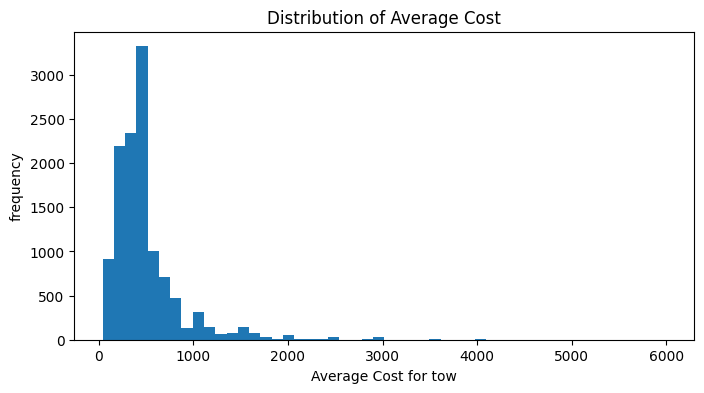

In [111]:
plt.figure(figsize=(8,4))
plt.hist(restuarant_df['avg_cost'], bins=50)
plt.title('Distribution of Average Cost')
plt.xlabel('Average Cost for tow')
plt.ylabel('frequency')
plt.show()

We can get the following insights from the abobe histogram:
- Most of the restaurants have average costs below 1000. So majority are budget friendly mid-range
- Right Skewness is observed in the histogram as very less no of restuarants which are actually the premium ones and have very high average costs.

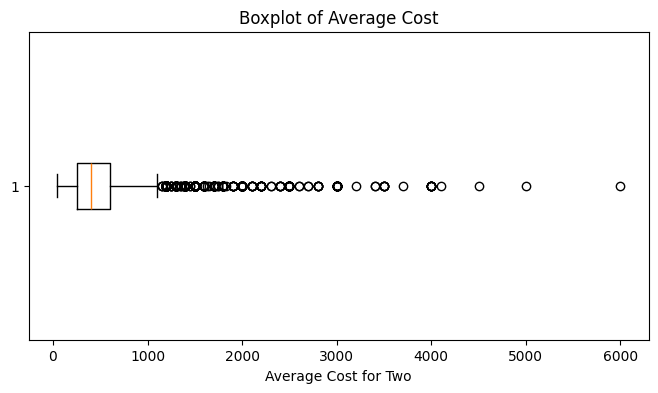

In [112]:
plt.figure(figsize=(8,4))
plt.boxplot(restuarant_df['avg_cost'], vert=False)
plt.title("Boxplot of Average Cost")
plt.xlabel("Average Cost for Two")
plt.show()


The above box plot gives clear visual explaination of the price distribution, skewness and the outliers which are premium restaurants with high average costs. It shows that there are very few premium restuarants compared to the budget and mid-range ones

In [113]:
location_cost = restuarant_df.groupby('location')['avg_cost'].mean().sort_values(ascending=False)
location_cost.head(10)

location
Sankey Road         2526.923077
Race Course Road    1316.666667
Lavelle Road        1289.636364
MG Road             1071.540016
Infantry Road        966.666667
Residency Road       956.645570
Church Street        765.900638
St. Marks Road       756.311688
Richmond Road        735.311542
Seshadripuram        733.620690
Name: avg_cost, dtype: float64

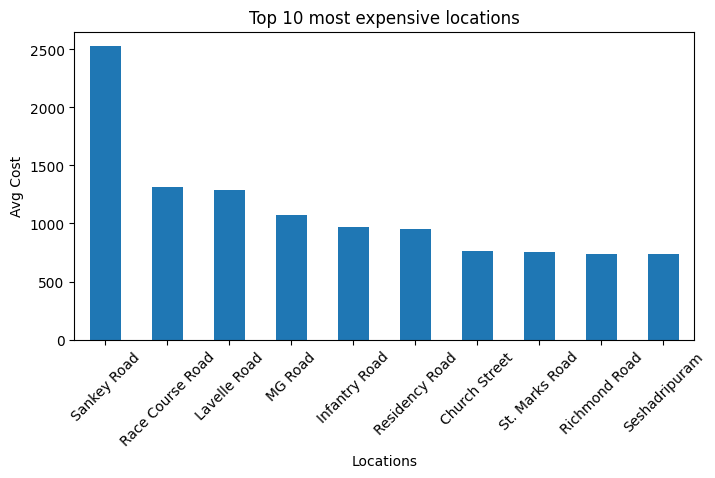

In [114]:
plt.figure(figsize=(8,4))
location_cost.head(10).plot(kind='bar')
plt.title("Top 10 most expensive locations")
plt.xlabel("Locations")
plt.ylabel("Avg Cost")
plt.xticks(rotation= 45)
plt.show()

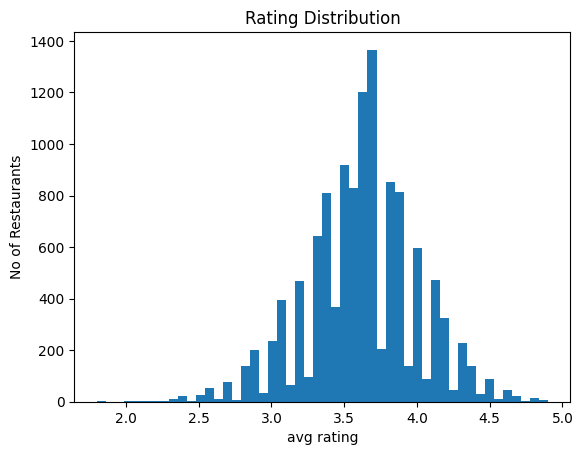

In [115]:
plt.hist(restuarant_df['avg_rating'], bins=50)
plt.title("Rating Distribution")
plt.xlabel("avg rating")
plt.ylabel("No of Restaurants")
plt.show()

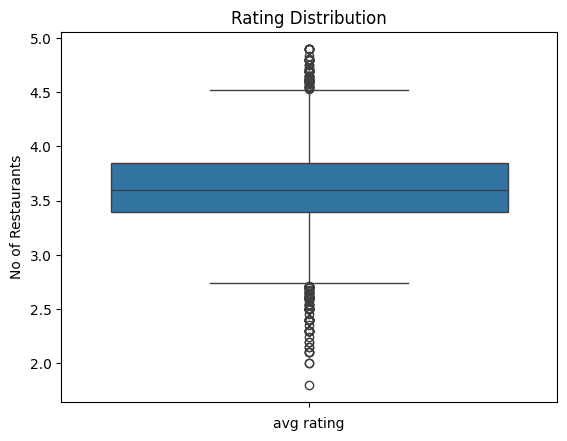

In [116]:
sns.boxplot(restuarant_df['avg_rating'])
plt.title("Rating Distribution")
plt.xlabel("avg rating")
plt.ylabel("No of Restaurants")
plt.show()

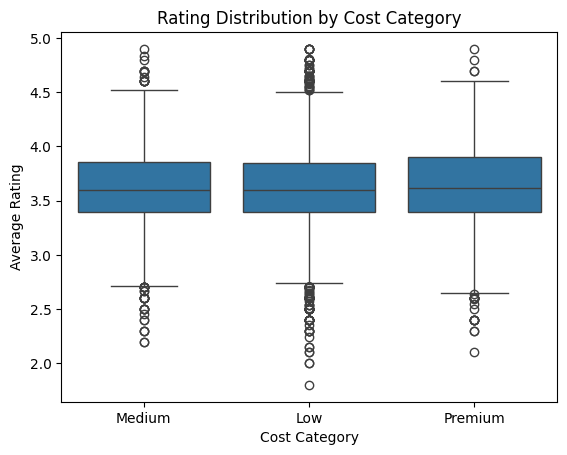

In [117]:
sns.boxplot(x=data['cost_category'], y='avg_rating', data=restuarant_df)
plt.title("Rating Distribution by Cost Category")
plt.xlabel("Cost Category")
plt.ylabel("Average Rating")

plt.show()

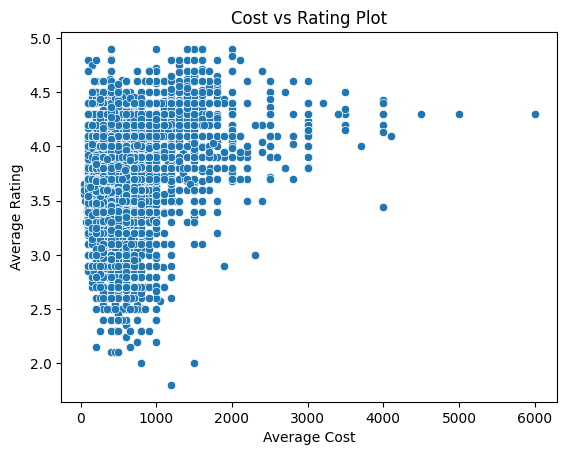

In [118]:
sns.scatterplot(x='avg_cost', y='avg_rating', data=restuarant_df)
plt.title("Cost vs Rating Plot")
plt.xlabel("Average Cost")
plt.ylabel("Average Rating")
plt.show()

Insights from the above scatterplot:

Premium restaurants generally receive higher ratings.

Ratings for mid-range and low-cost restaurants show more variation, with both high and low rated places present.

This suggests that higher price is often associated with better customer experience, but good ratings are still achievable at lower price points.

In [119]:
restuarant_df

,name,location,avg_rating,total_votes,avg_cost,num_dishes
0,1 Fahreheit,New BEL Road,3.919672,0,200.0,1
1,1000 BC,Koramangala 5th Block,3.200000,294,300.0,6
2,100C,BTM,3.700000,123,450.0,3
3,11 to 11 Express Biriyanis,Electronic City,3.500000,44,300.0,2
4,1131 Bar Kitchen,Indiranagar,4.500000,16938,1500.0,6
...,...,...,...,...,...,...
12109,nutree,Whitefield,4.275000,585,400.0,4
12110,recess Hilton Bangalore Embassy GolfLinks,Domlur,4.100000,438,1200.0,3
12111,refuel,Bannerghatta Road,3.700000,111,400.0,3
12112,repEAT Hub,Marathahalli,3.682245,0,200.0,2


In [120]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city),has_dish_info,cost_category,weighted_score,clean_name
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,1,Medium,27.282025,Jalsa
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,1,Medium,27.344942,Spice Elephant
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari,1,Medium,25.928487,San Churro Cafe
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari,1,Low,16.607955,Addhuri Udupi Bhojana
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari,1,Medium,19.448376,Grand Village


In [121]:
data['cuisine_list'] = data['cuisines'].str.split(',') 
data['cuisine_list'] = data['cuisine_list'].apply(
    lambda x: [c.strip() for c in x]
)
cuisines_df= data.explode('cuisine_list')

In [122]:
cuisines_df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city),has_dish_info,cost_category,weighted_score,clean_name,cuisine_list
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.10000,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,1,Medium,27.282025,Jalsa,North Indian
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.10000,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,1,Medium,27.282025,Jalsa,Mughlai
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.10000,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,1,Medium,27.282025,Jalsa,Chinese
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.10000,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,1,Medium,27.344942,Spice Elephant,Chinese
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.10000,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,1,Medium,27.344942,Spice Elephant,North Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.72682,0,Whitefield,Bar,No popular dish reported,Finger Food,2000.0,[],Pubs and bars,Whitefield,0,Premium,0.000000,Plunge Sheraton Grand Bengaluru Whitefield Hot...,Finger Food
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.30000,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,[],Pubs and bars,Whitefield,1,Premium,23.512659,Chime Sheraton Grand Bengaluru Whitefield Hotel &,Finger Food
51716,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,0,0,3.40000,13,"ITPL Main Road, Whitefield","Bar, Casual Dining",No popular dish reported,"Finger Food, North Indian, Continental",1500.0,[],Pubs and bars,Whitefield,0,Premium,8.972795,The Nest The Den Bengaluru,Finger Food
51716,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,0,0,3.40000,13,"ITPL Main Road, Whitefield","Bar, Casual Dining",No popular dish reported,"Finger Food, North Indian, Continental",1500.0,[],Pubs and bars,Whitefield,0,Premium,8.972795,The Nest The Den Bengaluru,North Indian


In [123]:
cuisines_df.to_csv("cuisines_df.csv", index=False)

In [124]:
cuisines_df= cuisines_df.drop(columns='cuisines')

In [125]:
cuisines_df=cuisines_df.drop(columns=['dish_liked', 'name', 'location'])
cuisines_df.head() 

,address,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),menu_item,listed_in(type),listed_in(city),has_dish_info,cost_category,weighted_score,clean_name,cuisine_list
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",1,1,4.1,775,Casual Dining,800.0,[],Buffet,Banashankari,1,Medium,27.282025,Jalsa,North Indian
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",1,1,4.1,775,Casual Dining,800.0,[],Buffet,Banashankari,1,Medium,27.282025,Jalsa,Mughlai
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",1,1,4.1,775,Casual Dining,800.0,[],Buffet,Banashankari,1,Medium,27.282025,Jalsa,Chinese
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",1,0,4.1,787,Casual Dining,800.0,[],Buffet,Banashankari,1,Medium,27.344942,Spice Elephant,Chinese
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",1,0,4.1,787,Casual Dining,800.0,[],Buffet,Banashankari,1,Medium,27.344942,Spice Elephant,North Indian


In [126]:
cuisines_df = cuisines_df.drop(columns=['listed_in(city)', 'listed_in(type)','rest_type', 'book_table','online_order', 'menu_item'])

In [127]:
cuisines_df = cuisines_df.drop(columns='address')
cuisines_df.head()

,rate,votes,approx_cost(for two people),has_dish_info,cost_category,weighted_score,clean_name,cuisine_list
0,4.1,775,800.0,1,Medium,27.282025,Jalsa,North Indian
0,4.1,775,800.0,1,Medium,27.282025,Jalsa,Mughlai
0,4.1,775,800.0,1,Medium,27.282025,Jalsa,Chinese
1,4.1,787,800.0,1,Medium,27.344942,Spice Elephant,Chinese
1,4.1,787,800.0,1,Medium,27.344942,Spice Elephant,North Indian


In [128]:
cols = ['clean_name'] + [col for col in cuisines_df.columns if col != 'clean_name']
cuisines_df = cuisines_df[cols]


In [129]:
cuisines_df.head()

,clean_name,rate,votes,approx_cost(for two people),has_dish_info,cost_category,weighted_score,cuisine_list
0,Jalsa,4.1,775,800.0,1,Medium,27.282025,North Indian
0,Jalsa,4.1,775,800.0,1,Medium,27.282025,Mughlai
0,Jalsa,4.1,775,800.0,1,Medium,27.282025,Chinese
1,Spice Elephant,4.1,787,800.0,1,Medium,27.344942,Chinese
1,Spice Elephant,4.1,787,800.0,1,Medium,27.344942,North Indian


In [130]:
cuisine_summary = (
    cuisines_df
    .groupby('cuisine_list')
    .agg(
        avg_rating = ('rate', 'mean'),
        total_votes= ('votes', 'sum'),
        avg_cost= ('approx_cost(for two people)', 'mean'),
        avg_weighted_score= ('weighted_score', 'mean'),
        restuarant_count= ('clean_name', 'nunique')
    )
    .reset_index() 
)

In [131]:
cuisine_summary.sort_values(by='avg_rating',ascending=False)

,cuisine_list,avg_rating,total_votes,avg_cost,avg_weighted_score,restuarant_count
24,Cantonese,4.600000,14122,2800.000000,35.714996,1
2,African,4.523529,11083,1047.058824,28.809946,2
90,Singaporean,4.414894,56700,1268.085106,30.609483,5
94,Sri Lankan,4.306667,45318,1240.000000,34.170676,2
60,Malaysian,4.306422,138051,1352.752294,28.747332,16
...,...,...,...,...,...,...
25,Charcoal Chicken,3.527150,4184,426.704545,9.221480,14
42,Hot dogs,3.500000,31,366.666667,8.105466,2
77,Pan Asian,3.454830,13,933.333333,2.639057,2
52,Kashmiri,3.333712,4172,639.393939,9.155400,4


In [132]:
cuisine_summary.sort_values(by=['restuarant_count','avg_weighted_score'], ascending=False)

,cuisine_list,avg_rating,total_votes,avg_cost,avg_weighted_score,restuarant_count
74,North Indian,3.627329,6858255,620.650178,14.041114,3932
27,Chinese,3.601476,4078042,601.731910,13.937936,2975
92,South Indian,3.604808,1323212,436.683943,10.855593,2011
33,Fast Food,3.603677,1034629,397.639452,11.643480,1425
17,Biryani,3.549526,1255313,470.868145,12.259135,1231
...,...,...,...,...,...,...
8,Australian,3.800000,185,400.000000,13.822827,1
82,Raw Meats,3.700000,142,362.500000,13.309032,1
69,Mongolian,3.800000,360,333.333333,13.049151,1
45,Indian,3.682245,0,400.000000,0.000000,1


From the above table we can come to the conclusion:

Some cuisines have high ratings but low restaurant counts, indicating niche or emerging demand rather than mass popularity.

In [133]:
top_10_cuisines = cuisine_summary.sort_values(by='restuarant_count', ascending=False).head(10)

In [134]:
top_10_cuisines

,cuisine_list,avg_rating,total_votes,avg_cost,avg_weighted_score,restuarant_count
74,North Indian,3.627329,6858255,620.650178,14.041114,3932
27,Chinese,3.601476,4078042,601.731910,13.937936,2975
92,South Indian,3.604808,1323212,436.683943,10.855593,2011
33,Fast Food,3.603677,1034629,397.639452,11.643480,1425
17,Biryani,3.549526,1255313,470.868145,12.259135,1231
29,Continental,3.949153,4370661,1012.896097,20.618299,787
15,Beverages,3.778199,928364,414.954708,13.914204,734
30,Desserts,3.842297,1256700,440.081662,13.984437,703
23,Cafe,3.885826,2851617,641.759381,18.444365,551
96,Street Food,3.616784,368320,293.229287,13.098388,517


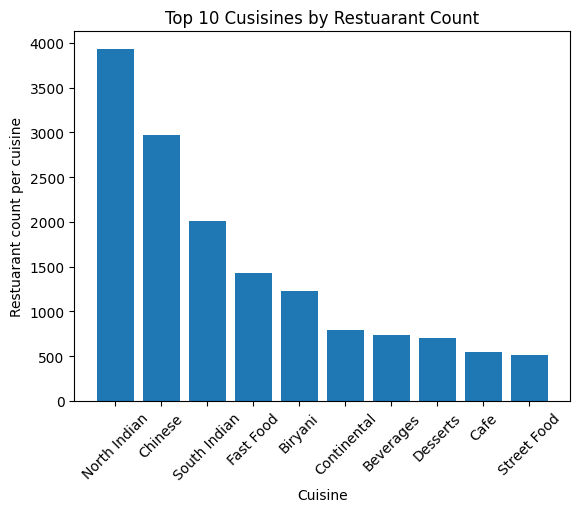

In [135]:
plt.bar(top_10_cuisines['cuisine_list'], top_10_cuisines['restuarant_count'])
plt.xlabel("Cuisine")
plt.ylabel("Restuarant count per cuisine")
plt.title("Top 10 Cusisines by Restuarant Count")
plt.xticks(rotation=45)
plt.show()


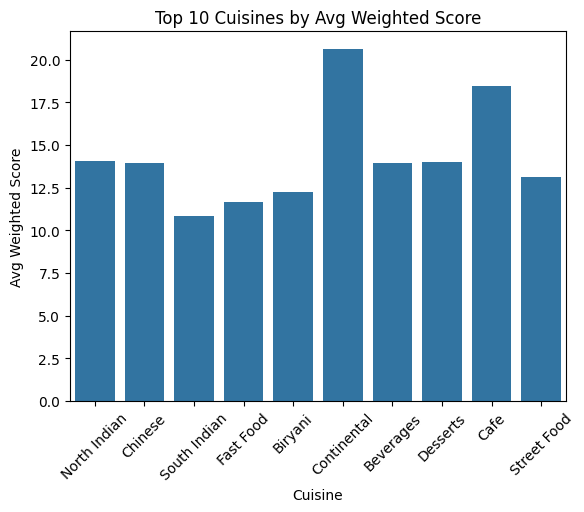

In [136]:
sns.barplot(x=top_10_cuisines['cuisine_list'], y=top_10_cuisines['avg_weighted_score'])
plt.xlabel("Cuisine")
plt.ylabel("Avg Weighted Score")
plt.title("Top 10 Cuisines by Avg Weighted Score")
plt.xticks(rotation=45)
plt.show()

# Insights from the above restaurant and cuisine level analysis:
- North Indian food is the most common cuisine in Bangalore, with the highest number of restaurants. This shows it is widely accepted and has steady demand, even though ratings are average.

- Continental cuisine has the highest weighted score, which means customers who order it generally rate it well and engage more. However, it is also more expensive, so it targets a smaller, premium audience.

- Chinese and South Indian cuisines perform well overall, as they have a good number of restaurants, decent ratings, and reasonable pricing.

- Fast Food and Street Food are popular mainly because they are affordable, not because they have very high ratings. People order them often for convenience.

- Higher price does not always mean better ratings, but in some cases (like Continental and Cafes), customers seem willing to pay more for better quality or experience.

- Overall, the platform shows two clear patterns:

 1) Cuisines with many restaurants and mass demand (North Indian, Chinese)

 2) Cuisines with fewer restaurants but better customer response (Continental, Café)

In [137]:
restuarant_df.to_csv("restaurant_df.csv", index=False)